<a href="https://colab.research.google.com/github/AtheeshV/work/blob/main/img_identifier_usingcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

#Upload the Kaggle API credentials JSON file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"atheesh1","key":"2d0b36cdf1544a4eca4aa389f930d4e0"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download --force tongpython/cat-and-dog #-d instead of -d

 94% 205M/218M [00:01<00:00, 164MB/s]
100% 218M/218M [00:01<00:00, 159MB/s]


In [ ]:
!unzip cat-and-dog.zip -d cat-and-dog

Streaming output truncated to the last 5000 lines.
  inflating: cat-and-dog/training_set/training_set/cats/cat.3704.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3705.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3706.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3707.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3708.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3709.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.371.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3710.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3711.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3712.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3713.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3714.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3715.jpg  
  inflating: cat-and-dog/tr

In [ ]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
import os
import matplotlib.pylab as plt
cat_folder = 'cat-and-dog/training_set/training_set/cats/'
dog_folder = 'cat-and-dog/training_set/training_set/dogs/'
# Initialize lists to store images and labels
images = []
labels = []
# Load and preprocess cat images
for filename in os.listdir(cat_folder):
    if filename.endswith('.jpg'):
      img = cv2.imread(os.path.join(cat_folder, filename))
      img = cv2.resize(img, (128, 128)) # resize the image to a common size
      images.append(img)
      labels.append(0) # 0 represents cats
#load and preprocess dog image
for filename in os.listdir(dog_folder):
    if filename.endswith('.jpg'):
      img = cv2.imread(os.path.join(dog_folder, filename))
      img = cv2.resize(img, (128, 128)) # resize the image to a commen size
      images.append(img)
      labels.append(1) # 1 represents cats
# convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split
#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# this part of code is important in assigment since we need to answer some questions
model = keras. Sequential([
layers. Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)), layers. MaxPooling2D((2, 2)), # input layers we used is 32
layers. Conv2D(64, (3, 3), activation='relu'), layers.MaxPooling2D( (2, 2)),
layers. Flatten(),
layers. Dense(64, activation='relu'),
layers. Dense(2, activation='softmax')
# 2 classes: cats and dogs ( we only have cats and dog so we only have to output)
])

#compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(x_train.shape)
print(y_train.shape)

(6404, 128, 128, 3)
(6404,)


In [ ]:
#train the model

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
161/161 [==============================] - 119s 734ms/step - loss: 20.9880 - accuracy: 0.5719 - val_loss: 0.6811 - val_accuracy: 0.5964
Epoch 2/10
161/161 [==============================] - 116s 721ms/step - loss: 0.5144 - accuracy: 0.7494 - val_loss: 0.7656 - val_accuracy: 0.6190
Epoch 3/10
161/161 [==============================] - 118s 736ms/step - loss: 0.3141 - accuracy: 0.8606 - val_loss: 1.0361 - val_accuracy: 0.6339
Epoch 4/10
161/161 [==============================] - 117s 726ms/step - loss: 0.1652 - accuracy: 0.9391 - val_loss: 1.2643 - val_accuracy: 0.6347
Epoch 5/10
161/161 [==============================] - 118s 735ms/step - loss: 0.1089 - accuracy: 0.9656 - val_loss: 1.3790 - val_accuracy: 0.6393
Epoch 6/10
161/161 [==============================] - 117s 726ms/step - loss: 0.1031 - accuracy: 0.9717 - val_loss: 1.5867 - val_accuracy: 0.6261
Epoch 7/10
161/161 [==============================] - 118s 733ms/step - loss: 0.0935 - accuracy: 0.9725 - val_loss: 2.0210 

In [ ]:
# testing process after we finish training

#Evaluate the model:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

51/51 - 10s - loss: 2.1401 - accuracy: 0.6408 - 10s/epoch - 197ms/step
Test accuracy: 0.6408494710922241


In [ ]:
#Example: Predicting on a single image

sample_image = x_test[5] #Replace with your image data
predictions = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(predictions)

#You can interpret the label using your database's class labels (0 for cat and 1 for dogs)
class_labels =['cat','dog']
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')

1/1 [==============================] - 0s 54ms/step
Predicted class: dog


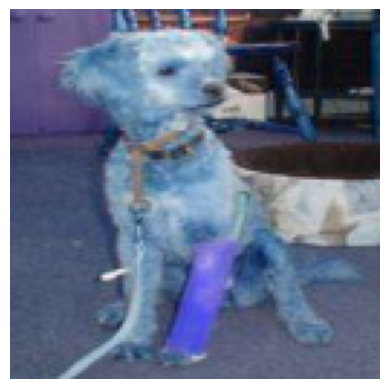

In [ ]:
import matplotlib.pyplot as plt

#Display the sample image
plt.imshow(sample_image)
plt.imshow(sample_image)
plt.axis('off') #Turn off axis labels and ticks
plt.show()

In [ ]:
uploaded_image = uploaded_image.astype('float32')/255.0
uploaded_image = np.expand_dims(uploaded_image, )